In [1]:
# from the baseline 2.2 run
import numpy as np
import matplotlib.pylab as plt
from rubin_scheduler.utils import ddf_locations, survey_start_mjd, calc_season

%matplotlib inline
from ddf_presched import optimize_ddf_times, generate_ddf_scheduled_obs

In [2]:
ddfs = ddf_locations()

ddf_data = np.load('/Users/yoachim/rubin_sim_data/scheduler/ddf_grid.npz')
ddf_grid = ddf_data['ddf_grid'].copy()

ddf_name = 'XMM_LSS'
survey_length = 10
mjd_start = survey_start_mjd()
mjd_max = mjd_start + survey_length * 365.25
in_range = np.where((ddf_grid["mjd"] >= mjd_start) & (ddf_grid["mjd"] <= mjd_max))
ddf_grid = ddf_grid[in_range]

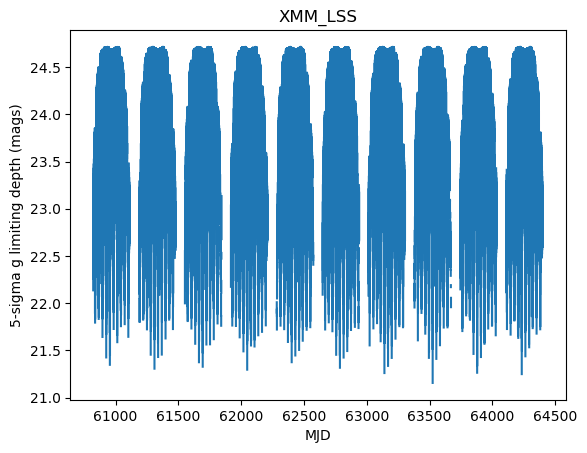

In [3]:
fig, ax = plt.subplots()

ax.plot(ddf_grid['mjd'], ddf_grid[ddf_name+'_m5_g'])
ax.set_title(ddf_name)
ax.set_xlabel('MJD')
ax.set_ylabel('5-sigma g limiting depth (mags)')
fig.savefig(ddf_name+'10years.pdf')

(61500.0, 62000.0)

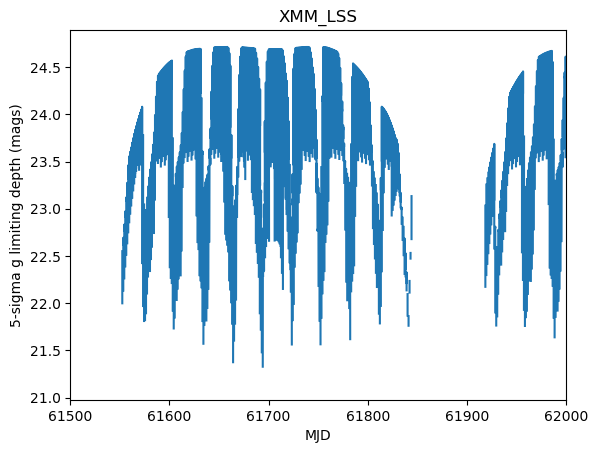

In [4]:
fig, ax = plt.subplots()

ax.plot(ddf_grid['mjd'], ddf_grid[ddf_name+'_m5_g'])
ax.set_title(ddf_name)
ax.set_xlabel('MJD')
ax.set_ylabel('5-sigma g limiting depth (mags)')
ax.set_xlim([61500, 62000])


(61600.0, 61700.0)

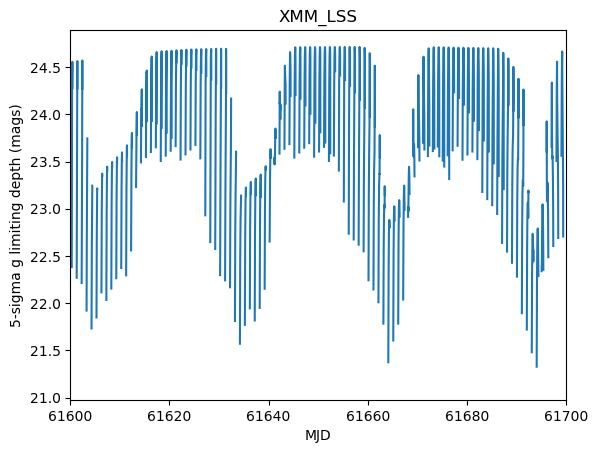

In [5]:
fig, ax = plt.subplots()

ax.plot(ddf_grid['mjd'], ddf_grid[ddf_name+'_m5_g'])
ax.set_title(ddf_name)
ax.set_xlabel('MJD')
ax.set_ylabel('5-sigma g limiting depth (mags)')
ax.set_xlim([61600, 61700])

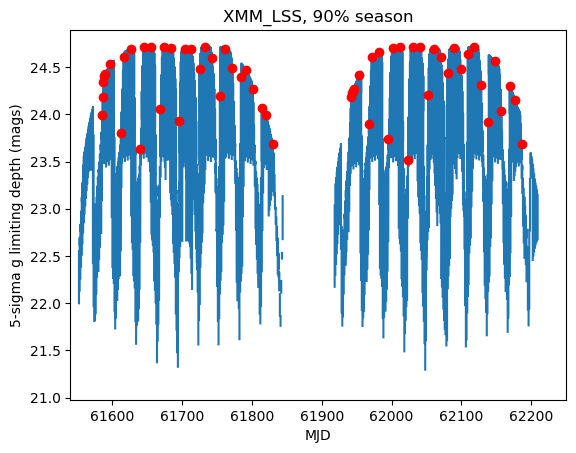

In [6]:
season_frac=0.1
sequence_limit=258
mjds = optimize_ddf_times(ddf_name, ddfs[ddf_name][0], ddf_grid,
                                  season_unobs_frac=season_frac, low_season_frac=0.1,
                                  low_season_rate=0.0,)[0]
fig, ax = plt.subplots()

ax.plot(ddf_grid['mjd'], ddf_grid[ddf_name+'_m5_g'])
ax.set_title(ddf_name + ', %i%% season' % ((1-season_frac)*100))
ax.set_xlabel('MJD')
ax.set_ylabel('5-sigma g limiting depth (mags)')
ax.set_xlim([61540, 62250])

ax.plot(mjds, np.interp(mjds, ddf_grid['mjd'], ddf_grid[ddf_name+'_m5_g']), 'ro')

#fig.savefig(ddf_name+'_%.1f.pdf' % season_frac)



In [8]:
n = np.ones(np.size(mjds))
cc_90 = np.cumsum(n)
mjd_90 = np.array(mjds) + 0

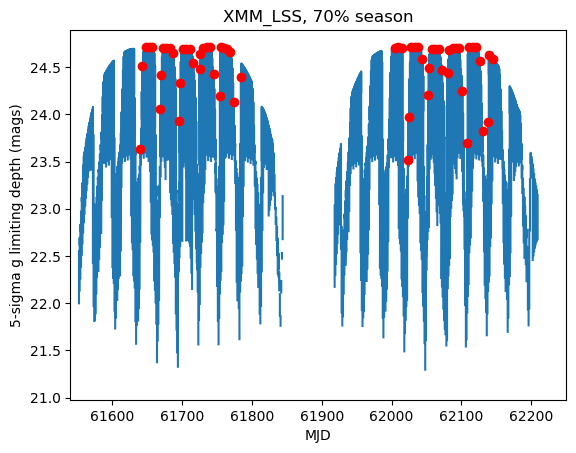

In [33]:
season_frac=0.3
sequence_limit=258
mjds = optimize_ddf_times(ddf_name, ddfs[ddf_name][0], ddf_grid,
                                  season_unobs_frac=season_frac, low_season_frac=0.1,
                                  low_season_rate=0.0,)[0]
fig, ax = plt.subplots()

ax.plot(ddf_grid['mjd'], ddf_grid[ddf_name+'_m5_g'])
ax.set_title(ddf_name + ', %i%% season' % ((1-season_frac)*100))
ax.set_xlabel('MJD')
ax.set_ylabel('5-sigma g limiting depth (mags)')
ax.set_xlim([61540, 62250])

ax.plot(mjds, np.interp(mjds, ddf_grid['mjd'], ddf_grid[ddf_name+'_m5_g']), 'ro')
#fig.savefig(ddf_name+'_%.1f.pdf' % season_frac)

n = np.ones(np.size(mjds))
cc_80 = np.cumsum(n)
mjd_80 = np.array(mjds) + 0

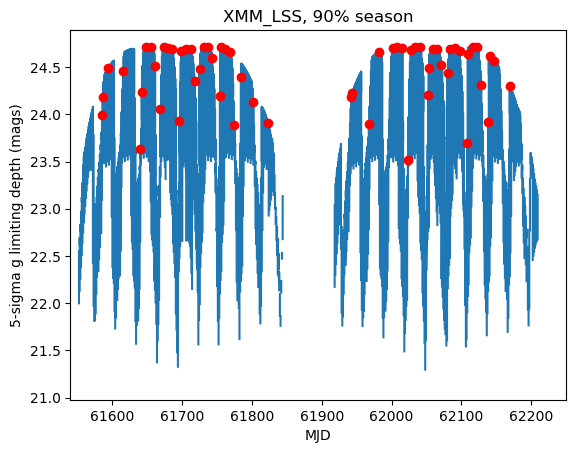

In [36]:
season_frac=0.1
sequence_limit=258
mjds = optimize_ddf_times(ddf_name, ddfs[ddf_name][0], ddf_grid,
                                  season_unobs_frac=season_frac, low_season_frac=0.3,
                                  low_season_rate=0.3,)[0]
fig, ax = plt.subplots()

ax.plot(ddf_grid['mjd'], ddf_grid[ddf_name+'_m5_g'])
ax.set_title(ddf_name + ', %i%% season' % ((1-season_frac)*100))
ax.set_xlabel('MJD')
ax.set_ylabel('5-sigma g limiting depth (mags)')
ax.set_xlim([61540, 62250])

ax.plot(mjds, np.interp(mjds, ddf_grid['mjd'], ddf_grid[ddf_name+'_m5_g']), 'ro')
#fig.savefig(ddf_name+'_%.1f.pdf' % season_frac)

n = np.ones(np.size(mjds))
cc_80 = np.cumsum(n)
mjd_80 = np.array(mjds) + 0

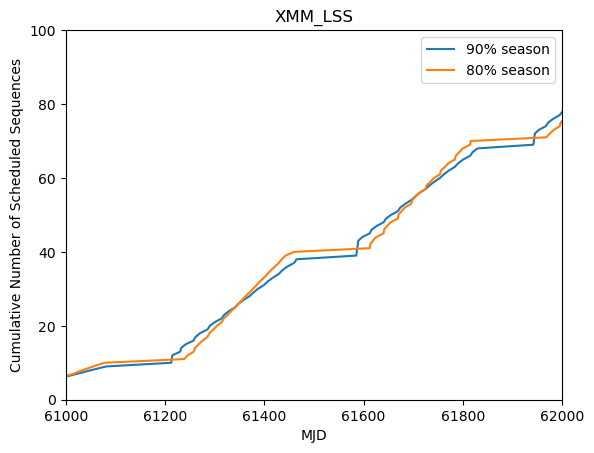

In [10]:
fig, ax = plt.subplots()

ax.plot(mjd_90, cc_90, label='90% season')
ax.plot(mjd_80, cc_80, label='80% season')
ax.set_xlim([61000, 62000])
ax.set_ylim([0, 100])

ax.set_xlabel('MJD')
ax.set_ylabel('Cumulative Number of Scheduled Sequences')
ax.legend()
ax.set_title(ddf_name )
fig.savefig(ddf_name + 'cumulative.pdf')

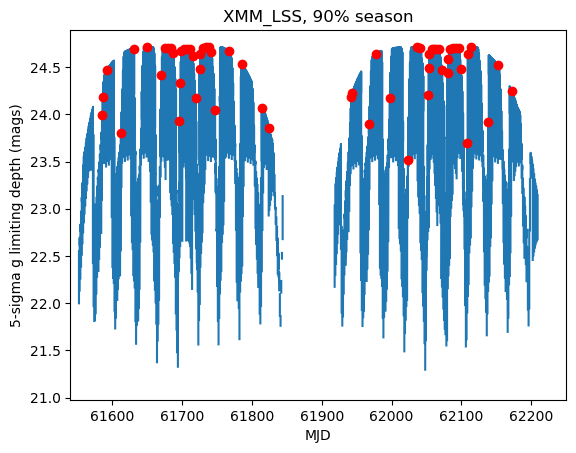

In [22]:
season_frac=0.1
sequence_limit=258
mjds = optimize_ddf_times(ddf_name, ddfs[ddf_name][0], ddf_grid,
                                  season_unobs_frac=season_frac,
                                  low_season_frac=0.4,
                                  low_season_rate=0.2,)[0]
fig, ax = plt.subplots()

ax.plot(ddf_grid['mjd'], ddf_grid[ddf_name+'_m5_g'])
ax.set_title(ddf_name + ', %i%% season' % ((1-season_frac)*100))
ax.set_xlabel('MJD')
ax.set_ylabel('5-sigma g limiting depth (mags)')
ax.set_xlim([61540, 62250])

ax.plot(mjds, np.interp(mjds, ddf_grid['mjd'], ddf_grid[ddf_name+'_m5_g']), 'ro')

#fig.savefig(ddf_name+'_%.1f.pdf' % season_frac)
n = np.ones(np.size(mjds))
cc_80 = np.cumsum(n)
mjd_80 = np.array(mjds) + 0




(0.0, 100.0)

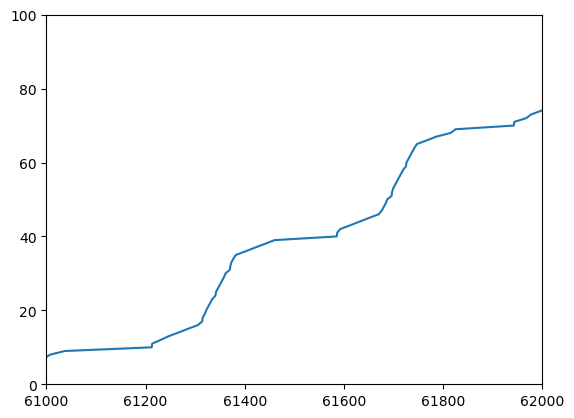

In [23]:

fig, ax = plt.subplots()

ax.plot(mjd_80, cc_80)


ax.set_xlim([61000, 62000])
ax.set_ylim([0, 100])


In [24]:
mjds, night_mjd, cumulative_desired, cumulative_sched = optimize_ddf_times(
    ddf_name,
    ddfs[ddf_name][0],
    ddf_grid, low_season_frac=0, low_season_rate=.3)

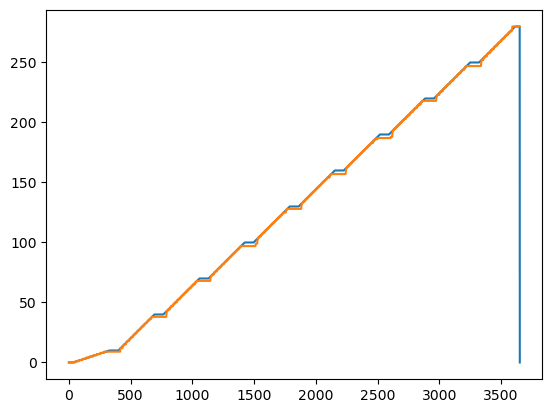

In [25]:
plt.plot(cumulative_desired)
plt.plot(cumulative_sched )

(0.0, 100.0)

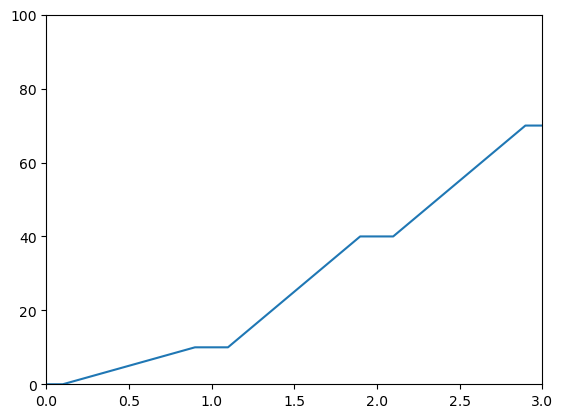

In [26]:
plt.plot(calc_season(ddfs[ddf_name][0],night_mjd),cumulative_desired)
#plt.plot(cumulative_sched)
plt.xlim([0,3])
plt.ylim([0,100])

(0.0, 100.0)

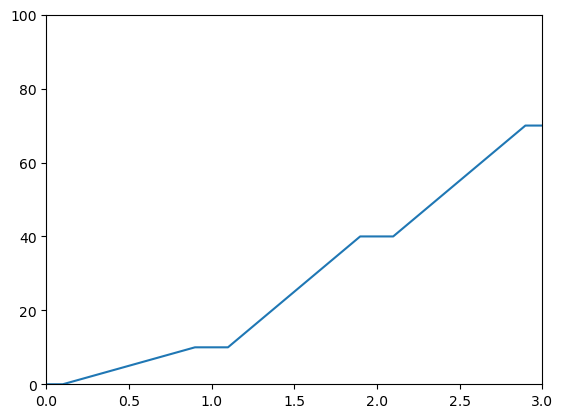

In [27]:
plt.plot(calc_season(ddfs[ddf_name][0],night_mjd),cumulative_desired)
#plt.plot(cumulative_sched)
plt.xlim([0,3])
plt.ylim([0,100])

In [17]:
night_mjd

array([60796.00208305, 60796.92916638, 60797.91874971, ...,
       64445.92916553, 64446.92916553, 64447.92916553])

In [18]:
np.diff(night_mjd)

array([0.92708333, 0.98958333, 1.        , ..., 1.        , 1.        ,
       1.        ])

(0.0, 100.0)

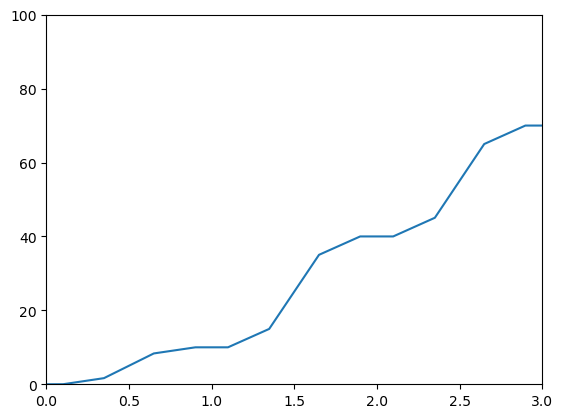

In [38]:
mjds, night_mjd, cumulative_desired, cumulative_sched = optimize_ddf_times(
    ddf_name,
    ddfs[ddf_name][0],
    ddf_grid, low_season_frac=.35, low_season_rate=.3)

plt.plot(calc_season(ddfs[ddf_name][0],night_mjd),cumulative_desired)
#plt.plot(cumulative_sched)
plt.xlim([0,3])
plt.ylim([0,100])